tensor([[ 0.7126, -5.3128, -5.2119],
        [ 5.5383,  2.4711,  8.8972],
        [-6.8086, -5.2186,  3.1495],
        [ 2.3365, -5.7776, -7.1959],
        [-5.5816,  6.5650, -2.6583]]) tensor([4, 0, 2, 4, 1])
torch.Size([200]) torch.Size([800]) torch.Size([200, 3]) torch.Size([800, 3])


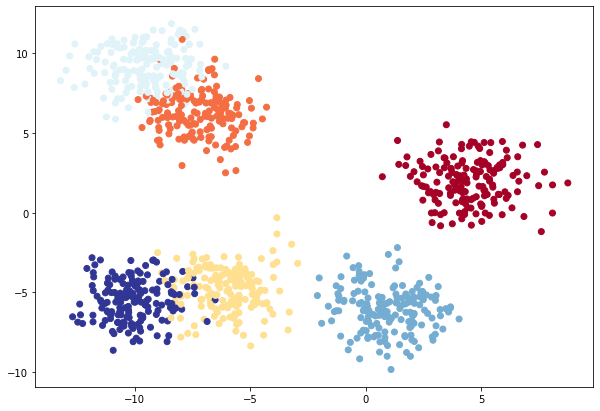

In [24]:
import torch as tc
from torch import nn

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 6
NUM_FEATURES = 3
RANDOM_SEED = 36


xblob , yblob = make_blobs(n_samples=1000,n_features=NUM_FEATURES,centers =NUM_CLASSES,random_state=RANDOM_SEED, cluster_std=1.3)

xblob =tc.from_numpy(xblob).type(tc.float)
yblob = tc.from_numpy(yblob).type(tc.LongTensor)
print(xblob[:5], yblob[:5])


xblob_train , xblob_test , yblob_train , yblob_test = train_test_split(xblob,yblob,test_size=0.2,random_state=RANDOM_SEED)
print(yblob_test.shape , yblob_train.shape , xblob_test.shape , xblob_train.shape)
plt.figure(figsize=(10, 7))
plt.scatter(xblob[:, 0], xblob[:, 1], c=yblob, cmap=plt.cm.RdYlBu);

In [25]:
device = "cuda" if tc.cuda.is_available() else "cpu"
device

'cpu'

In [26]:
class Model(nn.Module):
  def __init__(self,input_features, output_features, hidden_units):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )
  def forward(self,x):
    return self.layers(x)
model = Model(input_features = NUM_FEATURES,
              output_features = NUM_CLASSES,
              hidden_units=10).to(device)
model

Model(
  (layers): Sequential(
    (0): Linear(in_features=3, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=6, bias=True)
  )
)

In [27]:
loss_function = nn.CrossEntropyLoss()
optimizer = tc.optim.SGD(model.parameters(),lr=0.01)

xblob_train = xblob_train.to(device)
yblob_train = yblob_train.to(device)
xblob_test = xblob_test.to(device)
yblob_test = yblob_test.to(device)

In [28]:
def accuracy_function(y_true, y_pred):
    correct = tc.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

In [29]:
print(xblob_test.size())

print(xblob_train.size())


print(yblob_test.size())


print(yblob_train.size())


torch.Size([200, 3])
torch.Size([800, 3])
torch.Size([200])
torch.Size([800])


In [30]:
tc.manual_seed = 35
epochs = 10000

for epoch in range(epochs):
  model.train()

  train_logits = model(xblob_train)
  train_preds = tc.softmax(train_logits,dim=1).argmax(dim=1)

  train_loss = loss_function(train_logits,yblob_train)
  train_accuracy = accuracy_function(y_true=yblob_train , y_pred=train_preds)
  
  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()


  model.eval()
  with tc.inference_mode():
    test_logits = model(xblob_test)
    test_preds = tc.softmax(test_logits,dim=1).argmax(dim=1)
    # print(test_logits[:5])
    # print(yblob_test[:5])
    test_loss = loss_function(test_logits , yblob_test)
    test_acc = accuracy_function(yblob_test,test_preds)

  if epoch%100==0:
    print(f"epoch={epoch} || train_loss={train_loss :.5f} || train accuracy={train_accuracy:.2f} || test loss={test_loss:.5f} || test accuracy={test_acc:.2f}")



epoch=0 || train_loss=2.07023 || train accuracy=13.63 || test loss=1.99756 || test accuracy=17.50
epoch=100 || train_loss=0.90894 || train accuracy=72.88 || test loss=0.97752 || test accuracy=69.00
epoch=200 || train_loss=0.51018 || train accuracy=86.88 || test loss=0.57838 || test accuracy=82.00
epoch=300 || train_loss=0.28497 || train accuracy=93.00 || test loss=0.33530 || test accuracy=90.50
epoch=400 || train_loss=0.18120 || train accuracy=97.75 || test loss=0.21798 || test accuracy=97.50
epoch=500 || train_loss=0.12218 || train accuracy=99.12 || test loss=0.15072 || test accuracy=98.00
epoch=600 || train_loss=0.08583 || train accuracy=99.50 || test loss=0.10898 || test accuracy=98.00
epoch=700 || train_loss=0.06386 || train accuracy=99.50 || test loss=0.08356 || test accuracy=98.00
epoch=800 || train_loss=0.05054 || train accuracy=99.50 || test loss=0.06798 || test accuracy=98.00
epoch=900 || train_loss=0.04213 || train accuracy=99.50 || test loss=0.05809 || test accuracy=98.50
ep